# Úkol č. 2 - předzpracování dat a binární klasifikace (do 10. listopadu)

  * Cílem thoto úkolu je vyzkoušet si naučit prediktivní model pro binární klasifikaci.
  * Budete se muset vypořádat s příznaky, které jsou různých typů a které bude třeba nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru **data.csv** a data na vyhodnocení v souboru **evaluation.csv**.

#### Seznam příznaků:
* survived - zda přežil, 0 = Ne, 1 = Ano, **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * V Jupyter notebooku načtěte data ze souboru **data.csv**. Vhodným způsobem si je rozdělte na trénovací, testovací a případně i validační množinu (preferujeme ale použití cross-validation).
  * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
  * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména. Některé příznaky můžete také úplně zahodit.
  * Nějakým způsobem se vypořádejte s chybějícími hodnotami.
  * Následně si vyberte vhodný klasifikační model z přednášek. Najděte vhodné hyperparametry a určete jeho přesnost (accuracy) na trénovací množině. Také určete jeho přesnost na testovací/vaidační množině.
  * Načtěte vyhodnocovací data ze souboru **evaluation.csv**. Napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte **results.csv** soubor, ve kterém tyto predikce uložíte do dvou sloupců: ID, predikce přežití. Tento soubor nahrajte do repozitáře.

**Další body zadání** za případné další body  (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +4 body) Aplikujte všechny klasifikační modely z přednášek a určete (na základě přesnosti na validační množině), který je nejlepší. Přesnost tohoto nejlepšího modelu odhadněte pomocí testovací množiny. K predikcím na vyhodnocovacích datech využijte tento model.
  * (až +4 body) Zkuste použít nějaké (alespoň dvě) netriviální metody doplňování chybějících hodnot u věku. Zaměřte na vliv těchto metod na přesnost predikce výsledného modelu. K predikcím na vyhodnocovacích datech využijte ten přístup, který Vám vyjde jako nejlepší.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) s predikcemi pro vyhodnocovací data.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. **První verze je ale důležitá a bude-li odbytá, budete za to penalizováni**

In [113]:
### odtud už je to Vaše
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
data = pd.read_csv('data.csv')

In [115]:
data = data.replace('?', np.nan)
data.age = data.age.fillna(-1).astype(np.float32)
data.fare = data.fare.fillna(-1).astype(np.float32)
strc = data.select_dtypes(['object']).columns
data[strc] = data[strc].astype('category').apply(lambda x: x.cat.codes)
data.isnull().sum(axis=0)

ID           0
survived     0
pclass       0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
home.dest    0
dtype: int64

In [116]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
Xdata = data.iloc[:,2:]
ydata = data.iloc[:,[1]]
display(Xdata)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,666,0,22.0,0,0,384,7.750000,-1,2,-1
1,3,619,1,-1.0,0,0,315,8.458300,-1,1,-1
2,1,95,0,19.0,1,0,70,91.079201,35,0,82
3,3,794,1,25.0,0,0,230,7.225000,-1,0,-1
4,3,316,1,-1.0,0,0,506,7.750000,-1,1,147
5,1,961,1,27.0,0,2,32,211.500000,90,0,88
6,1,311,0,24.0,3,2,108,263.000000,68,2,311
7,3,235,0,-1.0,1,0,547,16.100000,-1,2,167
8,3,667,1,61.0,0,0,345,6.237500,-1,2,-1
9,3,754,1,8.0,4,1,542,29.125000,-1,1,-1


In [117]:
rds = 34
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
def split_data(Xdata, ydata, ratio=0.25, rd_seed=rds): #funkce na rozdeleni dat
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed) 
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
    return Xtrain, Xtest, Xval, ytrain, ytest, yval
Xtrain, Xtest, Xval, ytrain, ytest, yval = split_data(Xdata, ydata) #rozdelim data na trenovaci, validaci a testovaci mnoziny

In [118]:
display(Xtrain) #trenovaci data

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
429,3,208,0,36.0,0,2,620,15.900000,-1,2,97
419,3,296,1,-1.0,0,0,705,7.050000,-1,2,151
669,1,349,1,49.0,1,0,94,89.104202,97,0,221
19,2,635,1,62.0,0,0,157,9.687500,-1,1,50
786,2,80,0,4.0,2,1,127,39.000000,159,2,121
183,3,305,0,21.0,2,2,743,34.375000,-1,2,239
885,3,257,1,19.0,0,0,591,8.050000,-1,2,99
116,3,198,1,70.5,0,0,521,7.750000,-1,1,-1
357,3,795,1,-1.0,0,0,234,7.225000,-1,0,-1
212,3,966,0,47.0,1,0,474,7.000000,-1,2,-1


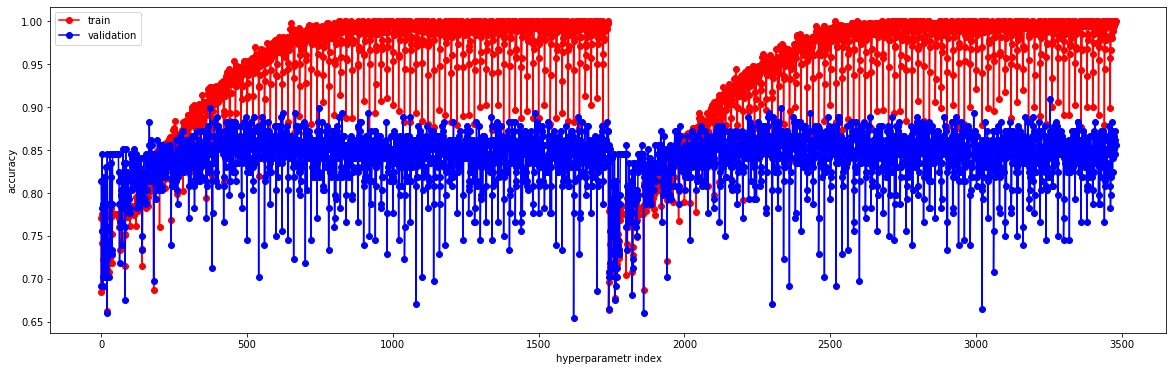

In [119]:
#1. metoda - metoda nahodnych lesu neboli Boostrap
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': range(1, 30),
    'criterion': ['gini', 'entropy'],
    'n_estimators': range(1,40,2),
    'max_features' : ['sqrt', 'log2', None]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
train_acc = []
for params in param_comb:
    dt = RandomForestClassifier(max_depth=params['max_depth'], criterion=params['criterion'],n_estimators=params['n_estimators'],max_features = params['max_features'] )
    dt.fit(Xtrain, ytrain.values.ravel())
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [120]:
best_params = param_comb[np.argmax(val_acc)]
best_params

{'n_estimators': 27,
 'max_features': 'sqrt',
 'max_depth': 26,
 'criterion': 'entropy'}

In [121]:
valid=[] #vysledky validace pridam do list valid
dt = RandomForestClassifier(**best_params)
dt.fit(Xtrain, ytrain.values.ravel())
k=dt.predict(Xval)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, k)))
valid.append(math.sqrt(metrics.accuracy_score(yval, k)))

accuracy score (train): 1.000000
accuracy score (validation): 0.856383


In [122]:
#2. metoda - boosting(zvysovani vah)
param_grid = {
    'n_estimators': range(1,100,2),
    'learning_rate': [0.01, 0.05, 0.001, 0.3, 0.5, 1]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = AdaBoostClassifier(learning_rate = params['learning_rate'], n_estimators=params['n_estimators'] )
    dt.fit(Xtrain, ytrain.values.ravel())
    val_acc.append(math.sqrt(metrics.accuracy_score(yval, dt.predict(Xval))))
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
dt = AdaBoostClassifier(**best_params)
dt.fit(Xtrain, ytrain.values.ravel())
k=dt.predict(Xval)
print('accuracy score (train): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))))
print('accuracy score (validation): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(yval, k))))
valid.append(math.sqrt(metrics.accuracy_score(yval, k)))

{'n_estimators': 17, 'learning_rate': 1}
accuracy score (train): 0.895819
accuracy score (validation): 0.922531


In [123]:
##dal jsem overil i jine metody, ktere jsem nasel v balicku sklearn.ensemble a taky je pridal do vyberu lepsi 
param_grid = {
    'n_estimators': range(1,100,2),
    'criterion': ['gini', 'entropy'],
    'max_features' : ['sqrt', 'log2', None]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = ExtraTreesClassifier(**params)
    dt.fit(Xtrain, ytrain.values.ravel())
    val_acc.append(math.sqrt(metrics.accuracy_score(yval, dt.predict(Xval))))
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
dt = ExtraTreesClassifier(**best_params)
dt.fit(Xtrain, ytrain.values.ravel())
k=dt.predict(Xval)
print('accuracy score (train): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))))
print('accuracy score (validation): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(yval, k))))
valid.append(math.sqrt(metrics.accuracy_score(yval, k)))

{'n_estimators': 65, 'max_features': 'sqrt', 'criterion': 'gini'}
RMSLE (train): 1.000000
RMSLE (validation): 0.925410


In [124]:
param_grid = {
    'n_estimators': range(1,100,2)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = BaggingClassifier(**params)
    dt.fit(Xtrain, ytrain.values.ravel())
    val_acc.append(math.sqrt(metrics.accuracy_score(yval, dt.predict(Xval))))
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
dt = BaggingClassifier(**best_params) #tohle ale taky boostrap
dt.fit(Xtrain, ytrain.values.ravel())
k=dt.predict(Xval)
print('accuracy score (train): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))))
print('accuracy score (validation): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(yval, k))))
valid.append(math.sqrt(metrics.accuracy_score(yval, k)))

{'n_estimators': 57}
RMSLE (train): 1.000000
RMSLE (validation): 0.931140


In [125]:
param_grid = {
    'n_estimators': range(1,100,2),
    'learning_rate': [0.01, 0.05, 0.001, 0.3, 0.5, 1],
    'max_features' : ['sqrt', 'log2', None]
}
param_comb = ParameterGrid(param_grid)
val_acc = []
for params in param_comb:
    dt = GradientBoostingClassifier(**params)
    dt.fit(Xtrain, ytrain.values.ravel())
    val_acc.append(math.sqrt(metrics.accuracy_score(yval, dt.predict(Xval))))
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
dt = GradientBoostingClassifier(**best_params)
dt.fit(Xtrain, ytrain.values.ravel())
k=dt.predict(Xval)
print('accuracy score (train): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))))
print('accuracy score (validation): {0:.6f}'.format(math.sqrt(metrics.accuracy_score(yval, k))))
valid.append(math.sqrt(metrics.accuracy_score(yval, k)))

{'n_estimators': 89, 'max_features': 'sqrt', 'learning_rate': 0.05}
RMSLE (train): 0.922244
RMSLE (validation): 0.928279
RMSLE (test): 0.880909


In [126]:
display(valid)

[0.9254096275290226,
 0.9225312080288851,
 0.9254096275290226,
 0.9311397728567633,
 0.928279121632914]

In [138]:
#takze vyslo, ze nejlepsi metoda ta 4. - BaggingClassifier
#poziju ji na nasich evaluation datach
data1 = pd.read_csv('evaluation.csv')
data1 = data1.replace('?', np.nan)
data1.age = data.age.fillna(-1).astype(np.float32)
data1.fare = data.fare.fillna(-1).astype(np.float32)
strc = data1.select_dtypes(['object']).columns
data1[strc] = data1[strc].astype('category').apply(lambda x: x.cat.codes)
data1.isnull().sum(axis=0)
ids = data1.ID
data1 = data1.drop(columns = ['ID'])
param_grid = {
    'n_estimators': range(1,100,2)
}
param_comb = ParameterGrid(param_grid)
val_acc = []
dt = BaggingClassifier(n_estimators = 51)
dt.fit(Xtrain, ytrain.values.ravel())
kek = dt.predict(data1)
d = {'id': ids, 'predikce preziti': kek}
t = pd.DataFrame(data = d)
t.to_csv(r'resultst.csv')
final=pd.read_csv('resultst.csv')
del final['Unnamed: 0']
final.to_csv(r'results.csv', index = 0)
display(pd.read_csv('results.csv'))
os.remove("resultst.csv")

,id,predikce preziti
0,1000,0
1,1001,0
2,1002,0
3,1003,0
4,1004,0
5,1005,0
6,1006,1
7,1007,0
8,1008,1
9,1009,0


NameError: name 'os' is not defined